# Week 7 Assignment

This week we are collecting some data from Reddit and doing some basic EDA on it. You should:

- create your Reddit account and API keys
- collect data from a subreddit of your choice
    - at a minimum, collect the posts from the subreddit; optionally collect comments on the posts
- save the data to a SQLite3 database
- perform some basic EDA on the data
    - create at least 2 plots
- write a short analysis at the end describing the process and results
- turn in the Jupyter Notebook and PDF printout or export to the week 7 dropbox

***Optional* advanced section**
- Practice SQL queries and select a subsection of the posts you collected
- Modify your code to collect data beyond the 1000 item limit
- Collect comments from the posts for analysis next week and do some EDA on the comments (e.g. who is the top commenter, which commenters have the most up and down votes or most controversial posts, etc)
- examine n-grams ([bigrams](https://stackoverflow.com/a/37651184/4549682), trigrams) or [collocations](https://www.geeksforgeeks.org/nlp-word-collocations/)

Note: There is no solution file for this week.

In [1]:
import praw
import pandas as pd
import credentials


In [2]:
reddit = praw.Reddit(client_id=credentials.client_id,
                     client_secret=credentials.client_secret,
                     user_agent=credentials.user_agent)

In [3]:
# collect data
co_subreddit = reddit.subreddit('denverfood').hot(limit=20)

In [4]:
for post in co_subreddit:
    print(post.title, post.score)
    
    post.comments.replace_more(limit=2) 
    for comment in post.comments.list():
        print("Comment:", comment.body)
        print("Comment Score:", comment.score)
    #print(post.comments)

Been living in Denver for a little over a year now - here's my list 230
Comment: You love Asian food OP haha. Only comment is how much I agree with your What The Pho rating
Comment Score: 31
Comment: Huh, I enjoyed the banh mi at New Saigon. What did you not like about it?
Comment Score: 22
Comment: Man what did you get at blue pan? We got a pizza and a beer a piece and I feel our bill was pushing 80.
Comment Score: 49
Comment: Aung's is so good. Used to live nearby and went weekly. For Urban Farmer, try a non-brunch meal there. Have been for dinner probably 4 or 5 times and every time the steaks are spot on, really unique and delicious cocktails and tasty sides.
Comment Score: 11
Comment: Seems like we align pretty well. Hong Kong Station might be the best value proposition in the whole metro in terms of value and quality for price. Now I just gotta venture off the white people menu and start ordering intestines like my neighbor told me to.

With brooklyn's finest ranked equivalent wi

Comment: One of the owners played football at Michigan with Brady. I think he has his uniform framed at the Brown Dog location in Telluride if I remember correctly. So probably won’t ever see Michigan state hanging in there!
Comment Score: 51
Comment: Glad you had a good time! 

(I'm pretty sure I was your server)
Comment Score: 64
Comment: Blue Pan is Denver’s best pizza and it’s not close
Comment Score: 17
Comment: Yeah that shit is good
Comment Score: 19
Comment: I lived in Detroit. Plenty of debate on Spartans vs Wolverines.
Comment Score: 4
Comment: lol - you really want to align MSU with OSU and their “THE” university bs?

I was happy to leave all the UofM vs MSU jackassery behind when we moved 15 years ago. Loved Ann Arbor for many years, but moved for a reason. It still weirds me out how people are so mean to each other the day after the game every year… most of whom graduated from *neither* school… 

All that said, enjoy your pizza! ;)
Comment Score: 5
Comment: Screw the blue 

Comment: Oh this is heartbreaking!  I don't know how anyone can compare to the sheet variety, both in the single thali but also from day to day!  :(
Comment Score: 6
Comment: They're rebranding as a chain restaurant called "Desi Bites". I googled some other Desi Bites locations and they don't have the best Google reviews.
Comment Score: 4
Comment: What no way..
Comment Score: 3
Comment: Noooooo….
Comment Score: 3
Comment: I've only been two places in Denver that had Thali. One sucked. One was India's Restaurant on Hampden.

Spice Room has it on the menu but I haven't had it yet.
Comment Score: 1
Comment: Fuck! Just went there for the first time and thought the food was great
Comment Score: 1
Comment: What!? Why!?
Comment Score: 1
Comment: Noooo
Comment Score: 1
Comment: Is there more info on this? I don’t see anything on their website or Facebook page. Are they keeping the same location?
Comment Score: 1
This was pretty cool to see: 124
Comment: I guess it’s cool that Historian’s is fi

Comment: surprised no one has mentioned the bone marrow fried rice at hop alley.
Comment Score: 50
Comment: I had to add another recommendation.

Q-house had a very good pork fried rice.
Comment Score: 25
Comment: Basil fried rice from Pepper 2 Asian Bistro is my favorite
Comment Score: 27
Comment: Fortune Wok to table
Comment Score: 14
Comment: Makfam
Comment Score: 7
Comment: Katsu Ramen has excellent fried rice.
Comment Score: 12
Comment: Onefold is delicious as is the fried rice with Chinese sausage. Just wish it wasn't so oily. It gave me a tummy ache before and even more so after getting my gallbladder out.
Comment Score: 11
Comment: Pineapple Fried Rice at Jaya Asian Grill.
Comment Score: 6
Comment: Pineapple Fried Rice from US Thai
Comment Score: 8
Comment: Wokano Fried Rice at Wokano
Comment Score: 4
Comment: Hop Ally- bone marrow fired rice
Comment Score: 4
Comment: Just tried Lucky Noodles on Colfax and it was very on point.
Comment Score: 5
Comment: Bacon fried rice at Gree

Comment: $15 is tough, but my favorite cheap places are:

Kona Hawaiian BBQ

$1.35 a Scoop

Costco Pizza

Sakura House

Pho Duy

La Diabla (especially on Thursdays when pozole is BOGO)

H-Mart premade food (sashimi, fried food, rice etc.)

Chili Shack

Snarf's

Benny Blanco's

Burrito Express
Comment Score: 25
Comment: I think $15 is still totally doable. I am lazy and I take out way more than I should - here are some of my regular spots that are all around $15 or less for a meal (Highlands/north Denver):

Illegal Pete’s

Park burger

Tocabe

Postino

Mr Lucky’s

Taqueria la familia

US Thai

Adobo

Sonny’s Mediterranean 

Grateful Gnome

Pepper Asian Bistro

Atomic Cowboy

Fire on the Mountain

Ros Siam

Dimestore Delibar
Comment Score: 22
Comment: Vinh Xuong is $6.50 - $7.50 per sandwich. $8 - $9 with a soda.
Comment Score: 15
Comment: El Nopalito
Comment Score: 5
Comment: Pepper Asian Bistro 2
Comment Score: 8
Comment: Lechugas spanoli plate.

Bourbon Grill bourbon chicken. 

Chubby

Comment: [Toro Pot](https://www.westword.com/restaurants/the-toro-pot-is-a-denver-diner-invention-going-back-more-than-forty-years-9783907)
Comment Score: 9
Comment: Maybe... Green chili? The Denver Omelette?  The Elvis sandwich that was just a PB&J with bananas and bacon?
Comment Score: 16
Comment: Toro pot. Denver sandwich. Denver omelet. Cheeseburger. 

These are all foods invented or made famous in Denver.
Comment Score: 8
Comment: Yeah... There really isn't one
Comment Score: 15
Comment: Find a bar that has rocky mountain oysters and green chili cheese fries imo
Comment Score: 6
Comment: Denver doesn’t really have anything that would be considered regional. Steaks, and handheld burritos (Chipotle started here). The green chili stew is from New Mexico. But, as close to a local dish we have. Find a great neighborhood to enjoy to walk around and eat, bc this is where we shine. The Highlands has a good concentration of great spots and one of the more charming of areas.
Comment Score: 

Comment: That scallop was one of the best I’ve ever had. Definitely punches above its weight and totally worth the money.
Comment Score: 23
Comment: Fam, you wrote that so well I could taste it
Comment Score: 14
Comment: Thank you for writing this out, I went directly to their website to look around. I am in awe of some of the plating.
Comment Score: 4
Comment: I was here last night. Will probably be the culinary highlight of my whole year. Absolutely incredible ♥️
Comment Score: 5
Comment: Yiiikes. My wife and I ate there a couple times probably five or so years ago and we never spent more than $200-$250. It’s a damn shame how expensive everything has gotten.
Comment Score: 13
Comment: That bacon dashi sounds divine 😭
Comment Score: 3
Comment: Why no pork if you ate bacon in the same meal?
Comment Score: 1
Comment: To be fair they have changed the program several times since 5 years ago (and redid the interior during COVID)
Comment Score: 10
Comment: Michelin stars have a way of doing

In [5]:
#post.comments.replace_more(limit=None)

In [6]:
reddit_data = {'title': [],
               'link': [],
               'author': [],
               'total_comments': [],
               'comments': [],
               'score': [],
               'text': []}

# Fetching posts from 'denverfood' subreddit
co_subreddit = reddit.subreddit('denverfood').hot(limit=429)

# Iterate through each post
for post in co_subreddit:
    reddit_data['title'].append(post.title)
    reddit_data['link'].append(post.permalink)
    
    
    if post.author:
        reddit_data['author'].append(post.author.name)
    else:
        reddit_data['author'].append('')
    
    
    reddit_data['total_comments'].append(post.num_comments)
    
    
    post.comments.replace_more(limit=None)
    
    
    all_comments = [comment.body for comment in post.comments.list()]
    reddit_data['comments'].append(';'.join(all_comments))  # Join comments into a single string
    
    
    reddit_data['score'].append(post.score)
    
    
    reddit_data['text'].append(post.selftext)






In [7]:
co_df = pd.DataFrame(reddit_data)

In [8]:
co_df

,title,link,author,total_comments,comments,score,text
0,Been living in Denver for a little over a year...,/r/denverfood/comments/1b6fom5/been_living_in_...,allanmuffins,174,You love Asian food OP haha. Only comment is h...,234,
1,Blue Pan Pizza,/r/denverfood/comments/1b62ip7/blue_pan_pizza/,JohnJAram,52,One of the owners played football at Michigan ...,103,Today was my son’s 19th birthday and based on ...
2,Madras Cafe is closing this month. What's the ...,/r/denverfood/comments/1b6hgy7/madras_cafe_is_...,PlasmaWhore,9,Oh this is heartbreaking! I don't know how an...,10,Just learned that Madras Cafe is closing. This...
3,This was pretty cool to see:,/r/denverfood/comments/1b60ubw/this_was_pretty...,Namaste4Runner420,25,I guess it’s cool that Historian’s is finally ...,124,
4,Slovenian sausage and/or deli?,/r/denverfood/comments/1b6hq3q/slovenian_sausa...,Likeabalrog,2,Cracovia in Westminster has a sausage sampler ...,5,Are there any delis in the Denver area that se...
...,...,...,...,...,...,...,...
424,Birthday Dinner Recommendation,/r/denverfood/comments/198cml9/birthday_dinner...,thesnowgirl147,12,I had my birthday dinner at a the Wolf’s Tailo...,0,I am looking to have a more chill birthday thi...
425,Is there a place that sells Vietnamese salt co...,/r/denverfood/comments/197l8qe/is_there_a_plac...,DougDimmadummy,11,I don’t know for sure if its what your looking...,18,Same as the title says. I’m looking for a plac...
426,Where to find Nduja,/r/denverfood/comments/197sb95/where_to_find_n...,broccoli15,5,Any well stocked gourmet market should have it...,7,Like the title says. Looking to find Nduja ide...
427,What’s the best dumpling house in Denver/aurora?,/r/denverfood/comments/197dryi/whats_the_best_...,Mysterious-Monk4349,37,I love Nana's and the owner owns a few in Auro...,24,


In [9]:
#save the data to a SQLite3 database
import sqlite3

con = sqlite3.connect("co_food_reddit.sqlite")
co_df.to_sql('posts', con, if_exists='replace', index=False)

429

In [10]:
co_df_check = pd.read_sql_query('SELECT * FROM posts', con)
# close the connection when finished
con.close()
co_df_check

,title,link,author,total_comments,comments,score,text
0,Been living in Denver for a little over a year...,/r/denverfood/comments/1b6fom5/been_living_in_...,allanmuffins,174,You love Asian food OP haha. Only comment is h...,234,
1,Blue Pan Pizza,/r/denverfood/comments/1b62ip7/blue_pan_pizza/,JohnJAram,52,One of the owners played football at Michigan ...,103,Today was my son’s 19th birthday and based on ...
2,Madras Cafe is closing this month. What's the ...,/r/denverfood/comments/1b6hgy7/madras_cafe_is_...,PlasmaWhore,9,Oh this is heartbreaking! I don't know how an...,10,Just learned that Madras Cafe is closing. This...
3,This was pretty cool to see:,/r/denverfood/comments/1b60ubw/this_was_pretty...,Namaste4Runner420,25,I guess it’s cool that Historian’s is finally ...,124,
4,Slovenian sausage and/or deli?,/r/denverfood/comments/1b6hq3q/slovenian_sausa...,Likeabalrog,2,Cracovia in Westminster has a sausage sampler ...,5,Are there any delis in the Denver area that se...
...,...,...,...,...,...,...,...
424,Birthday Dinner Recommendation,/r/denverfood/comments/198cml9/birthday_dinner...,thesnowgirl147,12,I had my birthday dinner at a the Wolf’s Tailo...,0,I am looking to have a more chill birthday thi...
425,Is there a place that sells Vietnamese salt co...,/r/denverfood/comments/197l8qe/is_there_a_plac...,DougDimmadummy,11,I don’t know for sure if its what your looking...,18,Same as the title says. I’m looking for a plac...
426,Where to find Nduja,/r/denverfood/comments/197sb95/where_to_find_n...,broccoli15,5,Any well stocked gourmet market should have it...,7,Like the title says. Looking to find Nduja ide...
427,What’s the best dumpling house in Denver/aurora?,/r/denverfood/comments/197dryi/whats_the_best_...,Mysterious-Monk4349,37,I love Nana's and the owner owns a few in Auro...,24,


<Axes: ylabel='Frequency'>

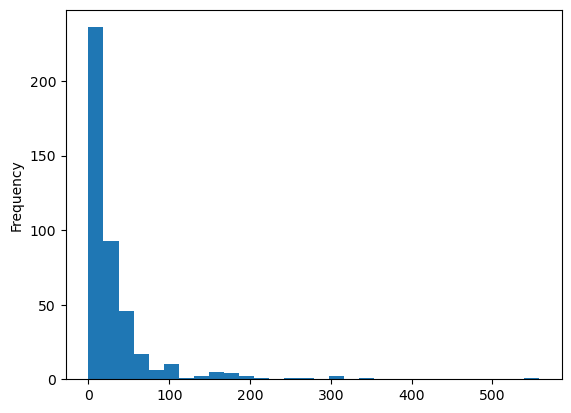

In [11]:
# perform some basic EDA on the data
# create at least 2 plots

co_df['total_comments'].plot.hist(bins=30)

<Axes: ylabel='Frequency'>

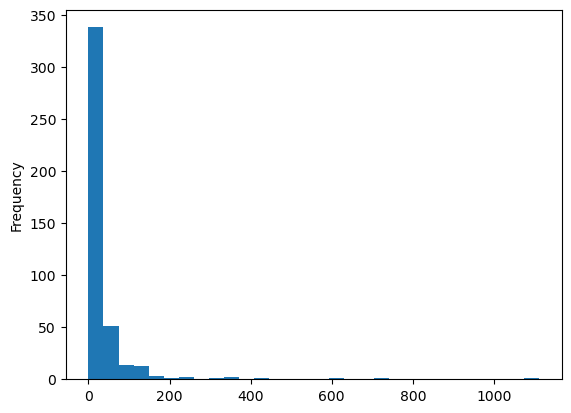

In [12]:

co_df['score'].plot.hist(bins=30)

<Axes: >

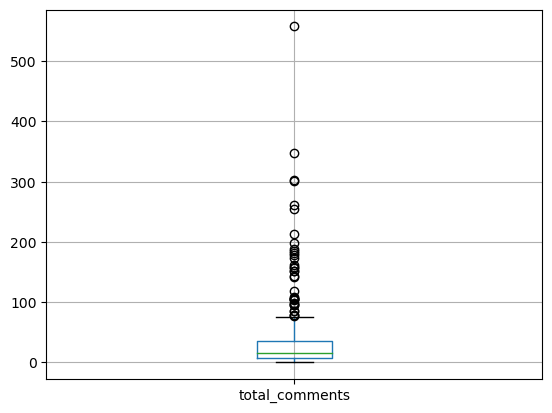

In [13]:
co_df.boxplot('total_comments')

<Axes: xlabel='score', ylabel='total_comments'>

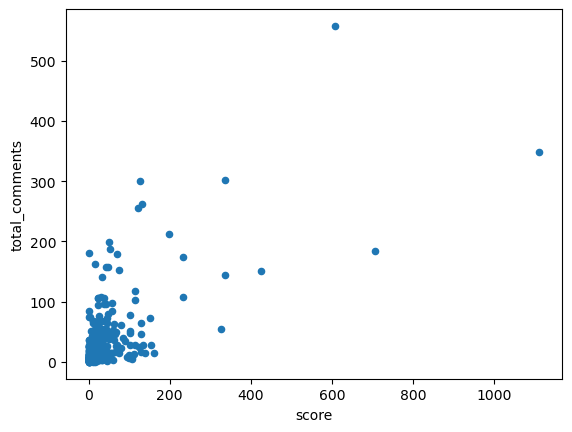

In [14]:
co_df.plot.scatter(x='score', y='total_comments')

<Axes: xlabel='author'>

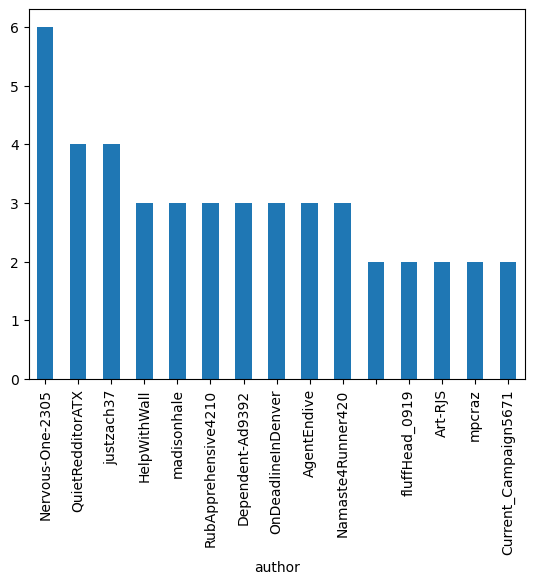

In [16]:
# top author with higest number of posts

co_df['author'].value_counts()[:15].plot.bar()

<Axes: xlabel='title'>

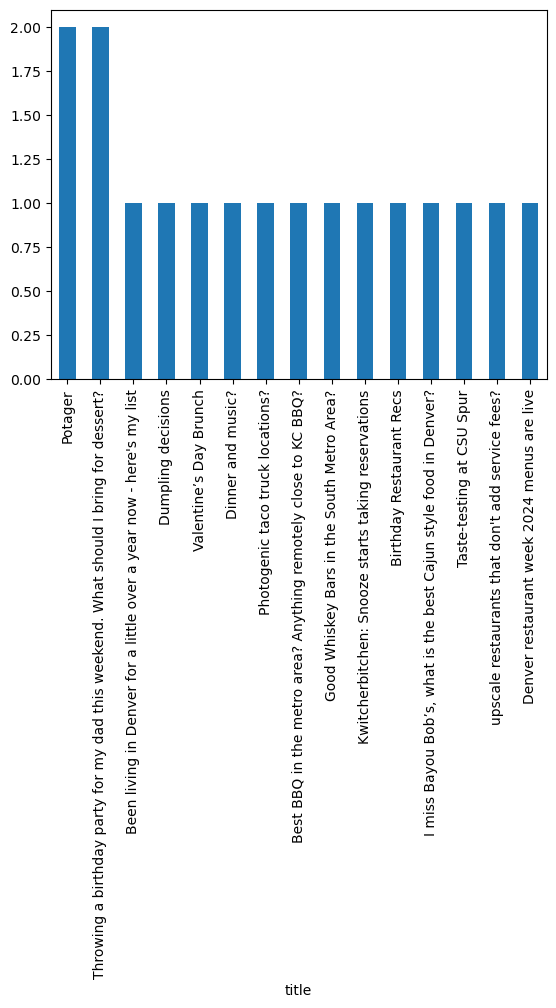

In [17]:
# title common words 

co_df['title'].value_counts()[:15].plot.bar()

# Analysis

Write a short analysis of the process and results here.

For this assignment, I began by first using PRAW to access the Reddit API. My client ID, secret, and user agent have been stored in another Python file for security. After completing this step, I retrieved my data by providing the Reddit title. Just to ensure that it was working, I looked at the first 20 posts, which verified that my code was functioning correctly.

To collect my data and store it into an SQL database, I started by creating a dictionary that would capture the title, link, author, total comments count, comments, score, and text of each post. I set a limit to how much data is being retrieved to 429 because I received an error indicating that only up to 429 posts were available. Therefore, I am assuming that this is the total number of posts available.

To retrieve attributes like the title, link, etc., I utilized the provided code from week 7 to append to the dictionary created. One new addition to this code was retrieving the comments. Retrieving the comments was simply done by iterating over all comments associated with one post and then storing them into the all_comments list using post.comments.list(). When appending the comments section to our dictionary, we separated all comments for one post with a semicolon to later assist with storing the comments in the SQL database.

Once all the data was retrieved, I converted it into a DataFrame to be easily readable. Subsequently, for the table to be used anytime, I created a SQLite3 database using the sqlite3 library. This way, I was able to retrieve the data using simple SQL queries.

For my exploratory data analysis (EDA), I created simple graphs such as the count of total comments, score, as well as a box plot of total comments. Additionally, I made a comparison graph between score and total comments. Furthermore, I also examined the top authors and top unique titles.